In [40]:
import numpy as np
import matplotlib.pyplot as plt

In [55]:
p = np.random.randn(5, 5)
np.power(p, 2)
np.random.randn(1)

array([ 1.26526014])

In [47]:
def hmc(U, gradU, m, dt, nstep, x, mhtest):
    p = np.random.randn(len(x), len(x)) * np.sqrt(m)
    oldX = x
    oldEnergy = np.transpose(p) * m * p / 2 + U(x)
    for i in range(nstep):
        p = p - gradU(x) * dt / 2
        x = x + p/m * dt
        p = p - gradU(x) * dt / 2
    p=-p
    if mhtest != 0:
        newEnergy = np.transpose(p) * m * p / 2 + U(x)
        if np.exp(oldEnergy - newEnergy) < np.random.uniform(size=1):
            x = oldX
    newx = x
    return(newx)

In [56]:
def sghmc(U, gradU, m, dt, nstep, x, C, V):
    p = np.random.randn(len(x), len(x)) * np.sqrt(m)
    B = 0.5 * V * dt
    D = np.sqrt(2 * (C-B) * dt)
    for i in range(nstep):
        p = p - gradU(x) * dt - p * C * dt + np.random.randn(1) * D
        x = x + p/m * dt
    newx = x
    return(newx)

In [34]:
nsample = 80000
xStep = 0.1
m = 1
C = 3
dt = 0.1
nstep = 50
V = 4

In [35]:
U = lambda x: -2 * np.power(x, 2) + np.power(x, 4)
gradU = lambda x: (-4 * x +  4 * np.power(x, 3)) +  np.random.randn(1) * 2;
gradUPerfect = lambda x: -4 * x +  4 * np.power(x, 3) 

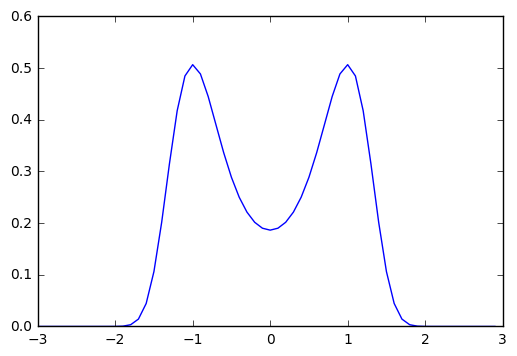

In [41]:
xGrid = np.arange(-3, 3, 0.1)
y = np.exp(-U(xGrid))
y = y/sum(y)/xStep
plt.plot(xGrid, y)

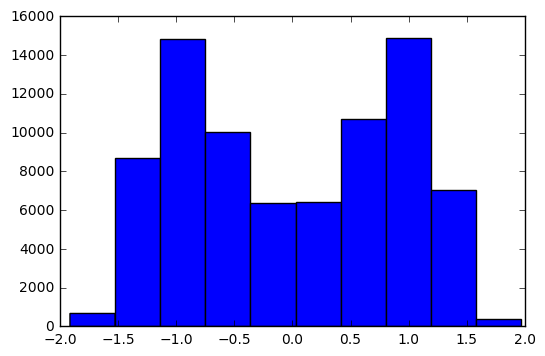

In [51]:
# wo noise, w mh
samples = np.zeros((nsample, 1))
x = np.zeros((1, 1))
for i in range(nsample):
    x = hmc(U, gradUPerfect, m, dt, nstep, x, 1)
    samples[i] = x
plt.hist(samples)
pass

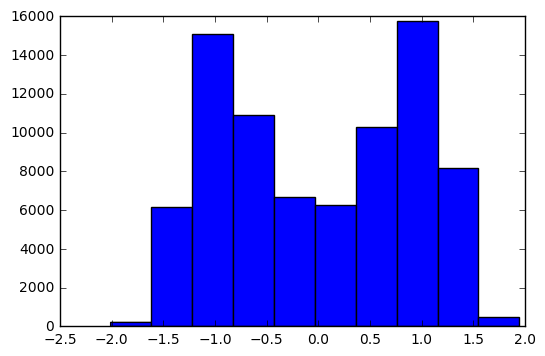

In [52]:
# wo noise, no mh
samples = np.zeros((nsample, 1))
x = np.zeros((1, 1))
for i in range(nsample):
    x = hmc(U, gradUPerfect, m, dt, nstep, x, 10)
    samples[i] = x
plt.hist(samples)
pass

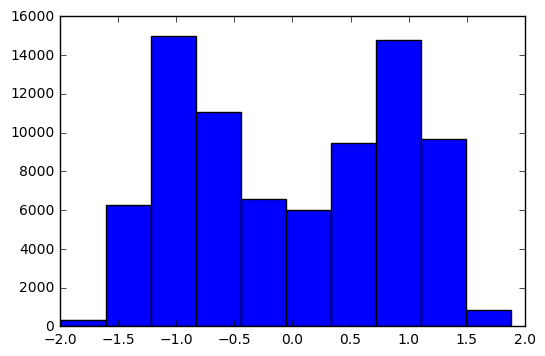

In [53]:
# w noise, w mh
samples = np.zeros((nsample, 1))
x = np.zeros((1, 1))
for i in range(nsample):
    x = hmc(U, gradU, m, dt, nstep, x, 1)
    samples[i] = x
plt.hist(samples)
pass

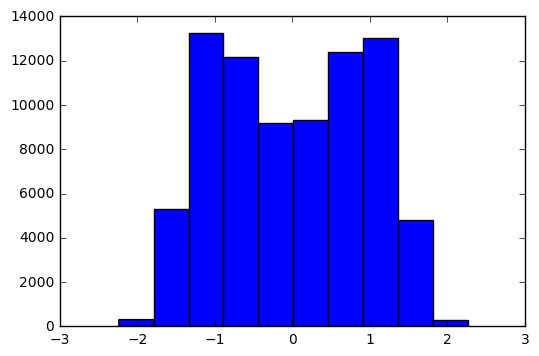

In [57]:
# w noise, no mh
samples = np.zeros((nsample, 1))
x = np.zeros((1, 1))
for i in range(nsample):
    x = hmc(U, gradU, m, dt, nstep, x, 0)
    samples[i] = x
plt.hist(samples)
pass

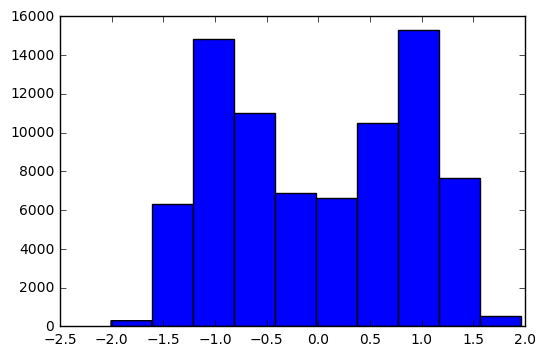

In [58]:
# w noise, no mh
samples = np.zeros((nsample, 1))
x = np.zeros((1, 1))
for i in range(nsample):
    x = sghmc(U, gradU, m, dt, nstep, x, C, V)
    samples[i] = x
plt.hist(samples)
pass

In [60]:
U = lambda x: 0.5 * np.power(x, 2)
gradU = lambda x: x + np.random.randn(1) * 2;
gradUPerfect = lambda x: x

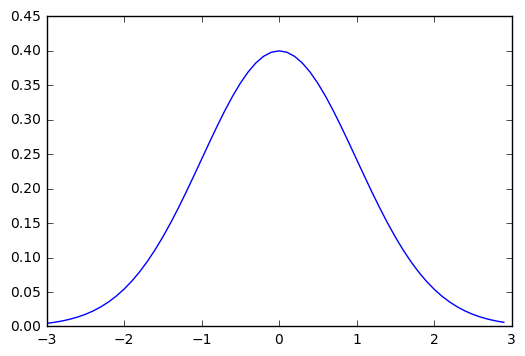

In [61]:
xGrid = np.arange(-3, 3, 0.1)
y = np.exp(-U(xGrid))
y = y/sum(y)/xStep
plt.plot(xGrid, y)

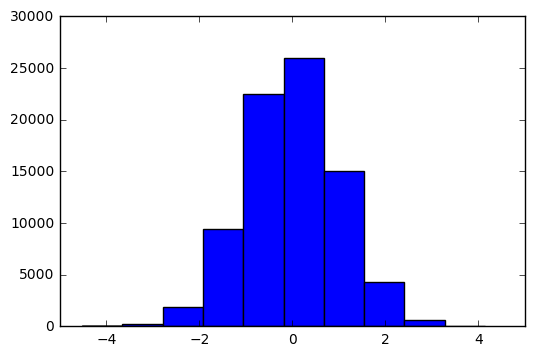

In [62]:
# wo noise, w mh
samples = np.zeros((nsample, 1))
x = np.zeros((1, 1))
for i in range(nsample):
    x = hmc(U, gradUPerfect, m, dt, nstep, x, 1)
    samples[i] = x
plt.hist(samples)
pass

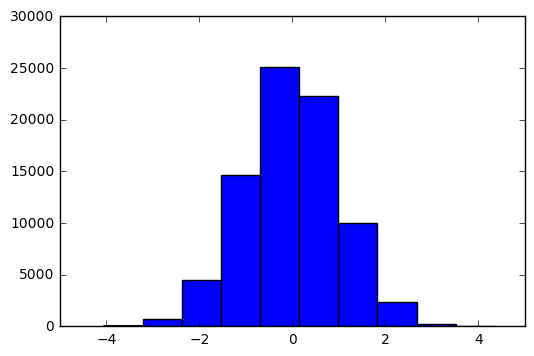

In [63]:
# wo noise, no mh
samples = np.zeros((nsample, 1))
x = np.zeros((1, 1))
for i in range(nsample):
    x = hmc(U, gradUPerfect, m, dt, nstep, x, 10)
    samples[i] = x
plt.hist(samples)
pass

In [64]:
# w noise, w mh
samples = np.zeros((nsample, 1))
x = np.zeros((1, 1))
for i in range(nsample):
    x = hmc(U, gradU, m, dt, nstep, x, 1)
    samples[i] = x
plt.hist(samples)
pass

KeyboardInterrupt: 

In [ ]:
# w noise, no mh
samples = np.zeros((nsample, 1))
x = np.zeros((1, 1))
for i in range(nsample):
    x = hmc(U, gradU, m, dt, nstep, x, 0)
    samples[i] = x
plt.hist(samples)
pass

In [ ]:
# w noise, no mh
samples = np.zeros((nsample, 1))
x = np.zeros((1, 1))
for i in range(nsample):
    x = sghmc(U, gradU, m, dt, nstep, x, C, V)
    samples[i] = x
plt.hist(samples)
pass